In [0]:
import keras

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

import numpy as np
import pandas as pd
from collections import defaultdict
import re

from bs4 import BeautifulSoup

import sys
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate, Dropout
from keras.models import Model

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3550550197020364719
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11240050551128077441
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12912041122904779489
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14912199066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3966663238400662895
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from ast import literal_eval
# data_train = pd.read_pickle('drive/My Drive/Colab Notebooks/fakenews-master/data/news_proc_12_3_19.pickle')
data_train = pd.read_csv('/content/drive/My Drive/MSIT 2nd Year/ML course/Projects/FInal Code/train.csv')
data_train = data_train[['label', 'text', 'title']]
data_train['label'].unique()

array([1, 0])

# Text Preprocessing

In [0]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 200000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [0]:
def clean_str(string):
    """
    Cleaning of dataset
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [0]:
# from ast import literal_eval
# data_train = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\AI Project\\train.csv')
# data_train = data_train[['label', 'text', 'title']]
# data_train['label'].unique()

In [0]:
data_train['label'] = data_train['label'].replace('fake',1)
data_train['label'] = data_train['label'].replace('real',0)

In [0]:
texts = []
labels = []

for i in range(data_train.text.shape[0]):
    text1 = data_train.title[i]
    text2 = data_train.text[i]
    text = str(text1) +""+ str(text2)
    texts.append(text)
    labels.append(data_train.label[i])

In [0]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 251876 unique tokens.


In [0]:
# Pad input sequences
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labels),num_classes = 2)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Shape of data tensor: (20800, 1000)
Shape of label tensor: (20800, 2)


In [0]:
# Train test validation Split
from sklearn.model_selection import train_test_split
print(type(data))
indices = np.arange(len(data))
print(indices)
np.random.shuffle(indices)
l = []
d = []
for each in indices:
  d.append(data[each])
  l.append(labels[each])
data =np.asarray(d)
labels = np.asarray(l)
print(type(data[0]))
x_train, x_test, y_train, y_test = train_test_split( data, labels, test_size=0.20, random_state=42)
x_test, x_val, y_test, y_val = train_test_split( data, labels, test_size=0.50, random_state=42)
print('Size of train, validation, test:', len(y_train), len(y_val), len(y_test))




<class 'numpy.ndarray'>
[    0     1     2 ... 20797 20798 20799]
<class 'numpy.ndarray'>
Size of train, validation, test: 16640 10400 10400


In [0]:
GLOVE_DIR = "/content/drive/My Drive/MSIT 2nd Year/ML course/Projects/FInal Code/"
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Bi-directional LSTM

In [0]:
params_lstm = {
    'lr': 0.2639850638741692,
    'momentum': 0.08255873365806747,
    'dropout': 0.10591561319817788,
    'dense1': 73,
    'dense2': 24,
    'lstmTitle': 46,
    'lstmContent': 231
}

In [0]:
from tensorflow import keras as k
import tensorflow as tf
#input_title
input = k.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), name='input')
inp = k.layers.Embedding(output_dim=EMBEDDING_DIM, input_dim=251877, 
                         weights=[embedding_matrix], trainable=False)(input)
x = k.layers.Bidirectional(k.layers.LSTM(params_lstm['lstmTitle']))(inp)

#Common part
x = k.layers.Dense(params_lstm['dense1'], activation='relu')(x)
x = k.layers.Dropout(params_lstm['dropout'])(x)
x = k.layers.Dense(params_lstm['dense2'], activation='relu')(x)
x = k.layers.Dropout(0.2)(x)

out = k.layers.Dense(2, activation='sigmoid')(x)

#Build model
model = k.models.Model(inputs=[input], outputs=[out])

model.compile(k.optimizers.SGD(lr=params_lstm['lr'], 
                              momentum=params_lstm['momentum']), 
                              loss='categorical_crossentropy', metrics=['acc'])

# model.compile(tf.train.MomentumOptimizer(learning_rate=params_lstm['lr'], 
#                                          momentum=params_lstm['momentum']), 
#                                          loss='binary_crossentropy', metrics=['acc'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1000, 100)         25187700  
_________________________________________________________________
bidirectional (Bidirectional (None, 

In [0]:
#  model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

# Test

In [0]:
params_lstm = {
    'lr': 0.001,
    'momentum': 0.08255873365806747,
    'dropout': 0.25,
    'dense1': 73,
    'dense2': 24,
    'lstmTitle': 46,
    'lstmContent': 231
}

In [0]:
from tensorflow import keras as k
import tensorflow as tf
#input_title
input = k.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), name='input')
inp = k.layers.Embedding(output_dim=EMBEDDING_DIM, input_dim=251877, 
                         weights=[embedding_matrix], trainable=False)(input)
x = k.layers.Bidirectional(k.layers.LSTM(params_lstm['lstmTitle']))(inp)

#Common part
x = k.layers.Dense(params_lstm['dense1'], activation='relu')(x)
x = k.layers.Dropout(params_lstm['dropout'])(x)
x = k.layers.Dense(params_lstm['dense2'], activation='relu')(x)
x = k.layers.Dropout(0.4)(x)

out = k.layers.Dense(2, activation='sigmoid')(x)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1000)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1000, 100)         25187700  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 92)                54096     
_________________________________________________________________
dense_6 (Dense)              (None, 73)                6789      
_________________________________________________________________
dropout_4 (Dropout)          (None, 73)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                1776      
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0   

In [0]:
model = k.models.Model(inputs=[input], outputs=[out])
model.compile(k.optimizers.Nadam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999), 
                              loss='categorical_crossentropy', metrics=['acc'])
# history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

In [0]:
  root_logdir = os.path.join(os.curdir, "my_logs")
  def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
  run_logdir = get_run_logdir()

  tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
  history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=12, batch_size=128)

Train on 16640 samples, validate on 10400 samples
Epoch 1/12
16640/16640 [==============================] - 469s 28ms/sample - loss: 0.4650 - acc: 0.7665 - val_loss: 0.2980 - val_acc: 0.8623
Epoch 2/12
16640/16640 [==============================] - 465s 28ms/sample - loss: 0.2557 - acc: 0.8930 - val_loss: 0.1813 - val_acc: 0.9308
Epoch 3/12
16640/16640 [==============================] - 445s 27ms/sample - loss: 0.1665 - acc: 0.9395 - val_loss: 0.1250 - val_acc: 0.9524
Epoch 4/12
16640/16640 [==============================] - 421s 25ms/sample - loss: 0.1226 - acc: 0.9558 - val_loss: 0.0965 - val_acc: 0.9663
Epoch 5/12
16640/16640 [==============================] - 414s 25ms/sample - loss: 0.0843 - acc: 0.9694 - val_loss: 0.0852 - val_acc: 0.9727
Epoch 6/12
16640/16640 [==============================] - 410s 25ms/sample - loss: 0.0728 - acc: 0.9731 - val_loss: 0.1070 - val_acc: 0.9612
Epoch 7/12
16640/16640 [==============================] - 417s 25ms/sample - loss: 0.0710 - acc: 0.9744 

# TensorBoard

In [0]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip

In [0]:
%tensorboard --logdir logs

In [0]:
%tensorboard --logdir log

In [0]:
import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(x_val, y_val),
                    callbacks=[tensorboard_callback])

In [0]:
%tensorboard_cb --logdir log

UsageError: Line magic function `%tensorboard_cb` not found.


In [0]:
%tensorboard --logdir logs

In [0]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir ./log (started 0:45:26 ago; pid 4248)
  - port 6007: logdir logs (started 0:01:26 ago; pid 4759)
  - port 6008: logdir log (started 0:00:34 ago; pid 4774)


In [0]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000) 

Selecting TensorBoard with logdir ./log (started 0:45:35 ago; port 6006, pid 4248).


In [0]:
# LOG_DIR = './log'
# get_ipython().system_raw(
#     'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
#     .format(LOG_DIR)
# )

In [0]:
# get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://cef45490.ngrok.io


In [0]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
%tensorboard_callback — logdir log

UsageError: Line magic function `%tensorboard_callback` not found.


# Plotting

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


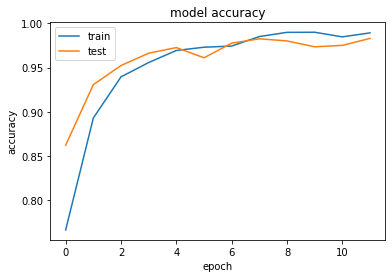

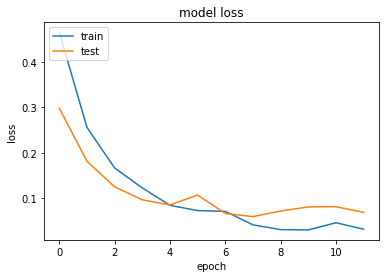

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the plot
plt.savefig('BiLSTM2_acc.png', bbox_inches='tight')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Save the plot
plt.savefig('BiLSTM2_loss.png', bbox_inches='tight')